# ECG Heartbeat Categorization - EDA

* Electrocardiogram (ECG) is used to track the functionality of the cardiovascular system.
* This project focuses on accurately classifying five different rhythms. 
* The dataset is composed of two collections of heartbeat signals derived from two datasets in heartbeat classification, the MIT-BIH Arrhythmia Dataset and The PTB Diagnostic ECG Database.
* Dataset Link: https://www.kaggle.com/shayanfazeli/heartbeat?select=mitbih_train.csv

### Initial Data Exploration  
 
* Identify quality issues(e.g. missing values)
* Assess feature Quality - relevance of measurements
* Understand value distributions of the data using statistical meausures and visualizations

# Imports

In [1]:
# imports
import numpy as np
import pandas as pd
#!pip install pandas-profiling
#import pandas_profiling
#from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

## Download Data

In [2]:
data = pd.read_csv("mitbih_train.csv")
data.shape

(87553, 188)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87553 entries, 0 to 87552
Columns: 188 entries, 9.779411554336547852e-01 to 0.000000000000000000e+00.88
dtypes: float64(188)
memory usage: 125.6 MB


In [4]:
#Check for missing values
print("Missing values:",data.isna().sum().sum())

Missing values: 0


In [5]:
# View some stats about the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
9.779411554336547852e-01,87553.0,0.890359,0.240910,0.0,0.921922,0.991342,1.000000,1.0
9.264705777168273926e-01,87553.0,0.758158,0.221814,0.0,0.682482,0.826007,0.910506,1.0
6.813725233078002930e-01,87553.0,0.423969,0.227305,0.0,0.250965,0.429467,0.578767,1.0
2.450980395078659058e-01,87553.0,0.219104,0.206880,0.0,0.048458,0.165992,0.341727,1.0
1.544117629528045654e-01,87553.0,0.201127,0.177058,0.0,0.082329,0.147870,0.258993,1.0
...,...,...,...,...,...,...,...,...
0.000000000000000000e+00.84,87553.0,0.003471,0.036255,0.0,0.000000,0.000000,0.000000,1.0
0.000000000000000000e+00.85,87553.0,0.003221,0.034790,0.0,0.000000,0.000000,0.000000,1.0
0.000000000000000000e+00.86,87553.0,0.002945,0.032865,0.0,0.000000,0.000000,0.000000,1.0
0.000000000000000000e+00.87,87553.0,0.002807,0.031924,0.0,0.000000,0.000000,0.000000,1.0


## There are Five Categories or Labels

* 0: N - Normal
* 1: S - Atrial premature
* 2: V - Premature ventricular contraction
* 3: F - Fusion of ventricular and normal
* 4: Q - Paced Unclassifiable 

## Label Mapping

In [6]:
# For class label mapping

class_label = {
    0: 'N - Normal',
    1: 'S - Atrial premature',
    2: 'V - Premature ventricular contraction',
    3: 'F - Fusion of ventricular and normal',
    4: 'Q - Paced Unclassifiable'
}

## Renumber the columns

In [7]:
# Renumber the columns for simplicity
for df in data:
    data.columns = list(range(len(data.columns)))

data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87548,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87549,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


## Rename the numbered column containing the categories

In [8]:
# Rename column to 'label'
data = data.rename({187: 'label'}, axis=1).copy()
data.T

,0,1,2,3,4,5,6,7,8,9,...,87543,87544,87545,87546,87547,87548,87549,87550,87551,87552
0,0.960114,1.000000,0.925414,0.967136,0.927461,0.423611,0.716814,0.874214,1.000000,0.985507,...,0.621951,0.799242,0.757235,0.717325,1.000000,0.807018,0.718333,0.906122,0.858228,0.901506
1,0.863248,0.659459,0.665746,1.000000,1.000000,0.791667,0.539823,0.849057,0.996086,0.880435,...,0.521341,0.515152,0.663987,0.627660,0.405594,0.494737,0.605000,0.624490,0.645570,0.845886
2,0.461538,0.186486,0.541436,0.830986,0.626943,1.000000,0.283186,0.480084,0.694716,0.518116,...,0.463415,0.545455,0.561093,0.534954,0.440559,0.536842,0.486667,0.595918,0.845570,0.800695
3,0.196581,0.070270,0.276243,0.586854,0.193437,0.256944,0.129794,0.058700,0.336595,0.213768,...,0.457317,0.553030,0.453376,0.427052,0.405594,0.529825,0.361667,0.575510,0.248101,0.748552
4,0.094017,0.070270,0.196133,0.356808,0.094991,0.000000,0.064897,0.090147,0.238748,0.126812,...,0.417683,0.526515,0.324759,0.322188,0.405594,0.491228,0.231667,0.530612,0.167089,0.687138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
184,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
186,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Check data types

In [9]:
data.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
          ...   
183      float64
184      float64
185      float64
186      float64
label    float64
Length: 188, dtype: object

## Check category distributions

<AxesSubplot:xlabel='label', ylabel='count'>

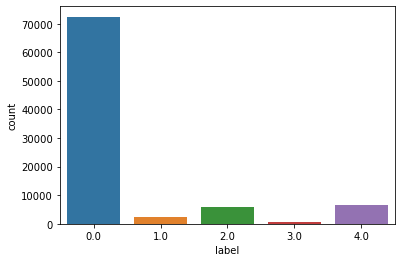

In [10]:
#Plot distributions
sns.countplot(x='label', data=data)

*Imbalanced categories will be handled during feature engineering stage*

## Split dataset from labels for visualizing

In [11]:
# Remove label column for plotting

split_df = data.drop(['label'],axis=1).copy()
split_label = data['label'].copy()

In [12]:
split_df

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87548,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87549,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87550,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87551,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
split_df.shape

(87553, 187)

In [14]:
split_label

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
87548    4.0
87549    4.0
87550    4.0
87551    4.0
87552    4.0
Name: label, Length: 87553, dtype: float64

In [15]:
split_label.shape

(87553,)

## Check for uniqueness

In [16]:
#Uniqueness check of split_df 
print(f'Split_df has {split_df.shape[0]} rows. Number of unique rows is {split_df.nunique()}.')

Split_df has 87553 rows. Number of unique rows is 0      23408
1      42845
2      49611
3      41007
4      39328
       ...  
182      968
183      920
184      843
185      778
186      748
Length: 187, dtype: int64.


In [17]:
#Uniqueness check of split_label 
print(f'Split_label has {split_label.shape[0]} rows. Number of unique rows is {split_label.nunique()}.')

Split_label has 87553 rows. Number of unique rows is 5.


## Visualize ECG Examples
Transpose to plot ECG segment accross all features

In [18]:
# Transpose the dataset to plot ecg across the features
# Axis 0 is now features and axis 1 is now samples ecg
split_df = split_df.T
split_df

,0,1,2,3,4,5,6,7,8,9,...,87543,87544,87545,87546,87547,87548,87549,87550,87551,87552
0,0.960114,1.000000,0.925414,0.967136,0.927461,0.423611,0.716814,0.874214,1.000000,0.985507,...,0.621951,0.799242,0.757235,0.717325,1.000000,0.807018,0.718333,0.906122,0.858228,0.901506
1,0.863248,0.659459,0.665746,1.000000,1.000000,0.791667,0.539823,0.849057,0.996086,0.880435,...,0.521341,0.515152,0.663987,0.627660,0.405594,0.494737,0.605000,0.624490,0.645570,0.845886
2,0.461538,0.186486,0.541436,0.830986,0.626943,1.000000,0.283186,0.480084,0.694716,0.518116,...,0.463415,0.545455,0.561093,0.534954,0.440559,0.536842,0.486667,0.595918,0.845570,0.800695
3,0.196581,0.070270,0.276243,0.586854,0.193437,0.256944,0.129794,0.058700,0.336595,0.213768,...,0.457317,0.553030,0.453376,0.427052,0.405594,0.529825,0.361667,0.575510,0.248101,0.748552
4,0.094017,0.070270,0.196133,0.356808,0.094991,0.000000,0.064897,0.090147,0.238748,0.126812,...,0.417683,0.526515,0.324759,0.322188,0.405594,0.491228,0.231667,0.530612,0.167089,0.687138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
184,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


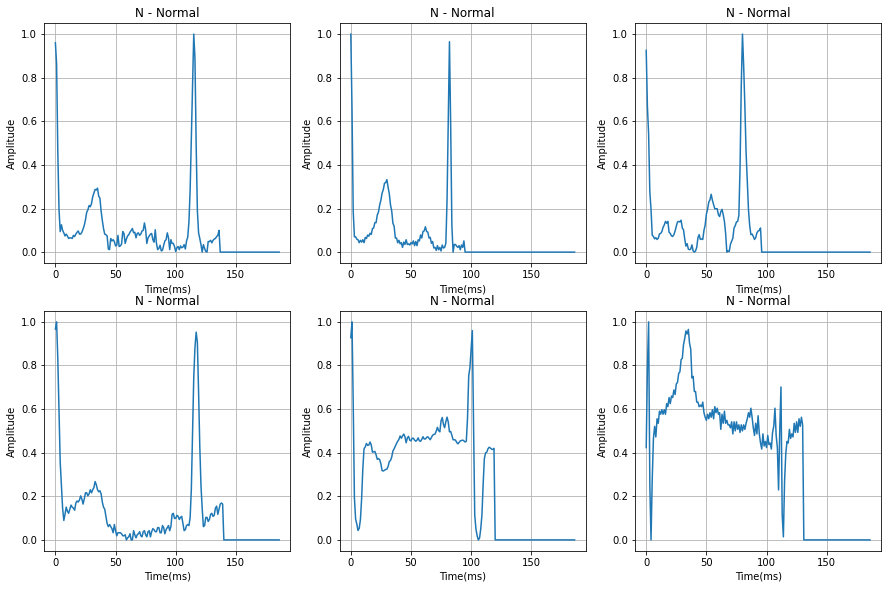

In [19]:
# Visualize ECG examples
plt.figure(figsize=(15, 15))

for i in range(6):
    plt.subplot(3, 3, i + 1)
    plt.plot(split_df[i])
    Classes = class_label[split_label[i]]
    plt.xlabel('Time(ms)')
    plt.ylabel('Amplitude')
    plt.title(Classes)
    plt.grid()

## Individually Selected ECG Examples

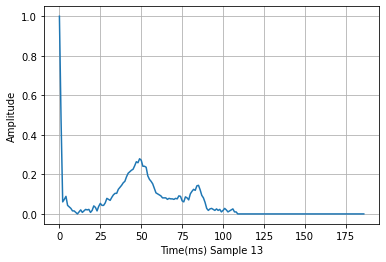

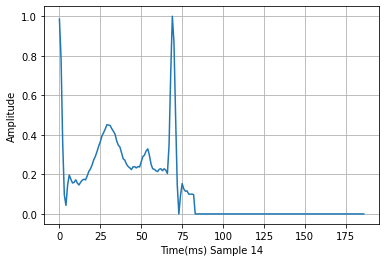

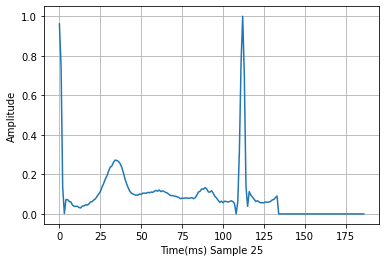

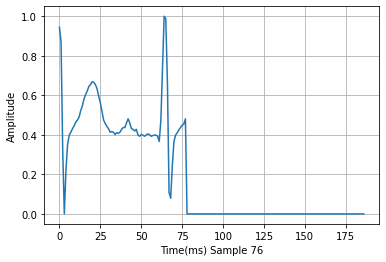

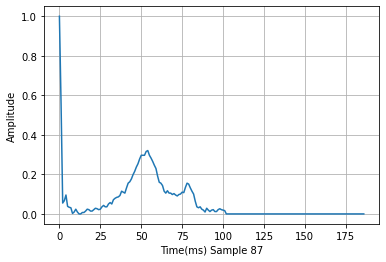

In [23]:
# Specific examples

plt.plot(split_df[13])
plt.xlabel('Time(ms) Sample 13')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

plt.plot(split_df[14])
plt.xlabel('Time(ms) Sample 14')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

plt.plot(split_df[25])
plt.xlabel('Time(ms) Sample 25')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

plt.plot(split_df[76])
plt.xlabel('Time(ms) Sample 76')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

plt.plot(split_df[87])
plt.xlabel('Time(ms) Sample 87')
plt.ylabel('Amplitude')
plt.grid()

## Save dataset to csv file

In [21]:
# Save for full training
data.to_csv('data_ecg.csv', index=False)

In [22]:
# Sanity check
data_ecg = pd.read_csv('data_ecg.csv')
data_ecg.T

,0,1,2,3,4,5,6,7,8,9,...,87543,87544,87545,87546,87547,87548,87549,87550,87551,87552
0,0.960114,1.000000,0.925414,0.967136,0.927461,0.423611,0.716814,0.874214,1.000000,0.985507,...,0.621951,0.799242,0.757235,0.717325,1.000000,0.807018,0.718333,0.906122,0.858228,0.901506
1,0.863248,0.659459,0.665746,1.000000,1.000000,0.791667,0.539823,0.849057,0.996086,0.880435,...,0.521341,0.515152,0.663987,0.627660,0.405594,0.494737,0.605000,0.624490,0.645570,0.845886
2,0.461538,0.186486,0.541436,0.830986,0.626943,1.000000,0.283186,0.480084,0.694716,0.518116,...,0.463415,0.545455,0.561093,0.534954,0.440559,0.536842,0.486667,0.595918,0.845570,0.800695
3,0.196581,0.070270,0.276243,0.586854,0.193437,0.256944,0.129794,0.058700,0.336595,0.213768,...,0.457317,0.553030,0.453376,0.427052,0.405594,0.529825,0.361667,0.575510,0.248101,0.748552
4,0.094017,0.070270,0.196133,0.356808,0.094991,0.000000,0.064897,0.090147,0.238748,0.126812,...,0.417683,0.526515,0.324759,0.322188,0.405594,0.491228,0.231667,0.530612,0.167089,0.687138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
184,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
186,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
